## Developing Gradient Boosting for simple data

In [1]:
import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random

In [2]:
#Build a simple data set with y = x + random
nPoints = 1000

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]


In [3]:
#take fixed test set 30% of sample
nSample = int(nPoints * 0.30)
idxTest = random.sample(range(nPoints), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nPoints) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]

In [4]:
#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 30

#tree depth - typically at the high end
treeDepth = 5

#initialize a list to hold models
modelList = []
predList = []
eps = 0.3

#initialize residuals to be the labels y
residuals = list(yTrain)

for iTrees in range(numTreesMax):

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain, residuals)

    #make prediction with latest model and add to list of predictions
    latestInSamplePrediction = modelList[-1].predict(xTrain)

    #use new predictions to update residuals
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]

    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))



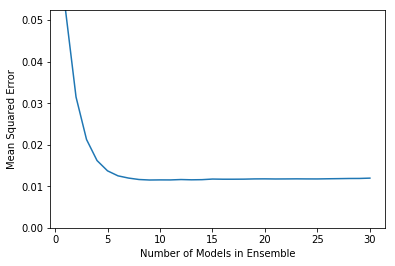

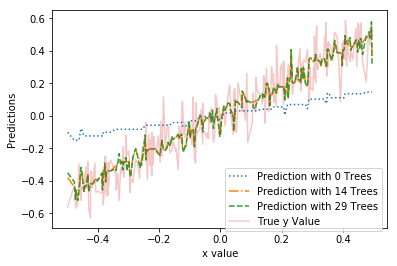

In [5]:
#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #add the first "iModels" of the predictions and multiply by eps
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)]) * eps)

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))


nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

plotList = [0, 14, 29]
lineType = [':', '-.', '--']
plot.figure()
for i in range(len(plotList)):
    iPlot = plotList[i]
    textLegend = 'Prediction with ' + str(iPlot) + ' Trees'
    plot.plot(xTest, allPredictions[iPlot], label = textLegend, linestyle = lineType[i])
plot.plot(xTest, yTest, label='True y Value', alpha=0.25)
plot.legend(bbox_to_anchor=(1,0.3))
plot.axis('tight')
plot.xlabel('x value')
plot.ylabel('Predictions')
plot.show()


## Gradient Boosting for Prediction Wine Quality

In [6]:
import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import random
from math import sqrt
import matplotlib.pyplot as plot

In [7]:
#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

nrows = len(xList)
ncols = len(xList[0])

In [8]:
#take fixed test set 30% of sample
nSample = int(nrows * 0.30)
idxTest = random.sample(range(nrows), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nrows) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [xList[r] for r in idxTrain]
xTest = [xList[r] for r in idxTest]
yTrain = [labels[r] for r in idxTrain]
yTest = [labels[r] for r in idxTest]

In [9]:
#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 30

#tree depth - typically at the high end
treeDepth = 5

#initialize a list to hold models
modelList = []
predList = []
eps = 0.1

#initialize residuals to be the labels y
residuals = list(yTrain)

for iTrees in range(numTreesMax):

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain, residuals)

    #make prediction with latest model and add to list of predictions
    latestInSamplePrediction = modelList[-1].predict(xTrain)

    #use new predictions to update residuals
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]

    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))

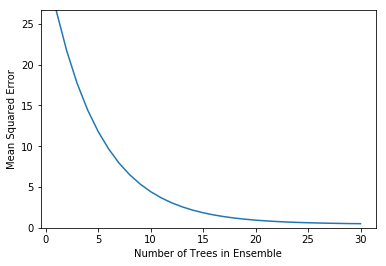

Minimum MSE
0.5040066660428456


In [10]:
#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #add the first "iModels" of the predictions and multiply by eps
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)]) * eps)

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))


nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

print('Minimum MSE')
print(min(mse))

#printed output
#Minimum MSE
#0.405031864814